Tổng trị giá nợ phải thu: 150,000.00 USD
Khoản tiền ứng trước (80%): 120,000.00 USD
Hoa hồng phí (2.0%): 3,000.00 USD
Lãi suất chiết khấu (12%/năm, 3 tháng): 3,600.00 USD
----------------------------------------
Số tiền ròng công ty nhận được ngay: 113,400.00 USD


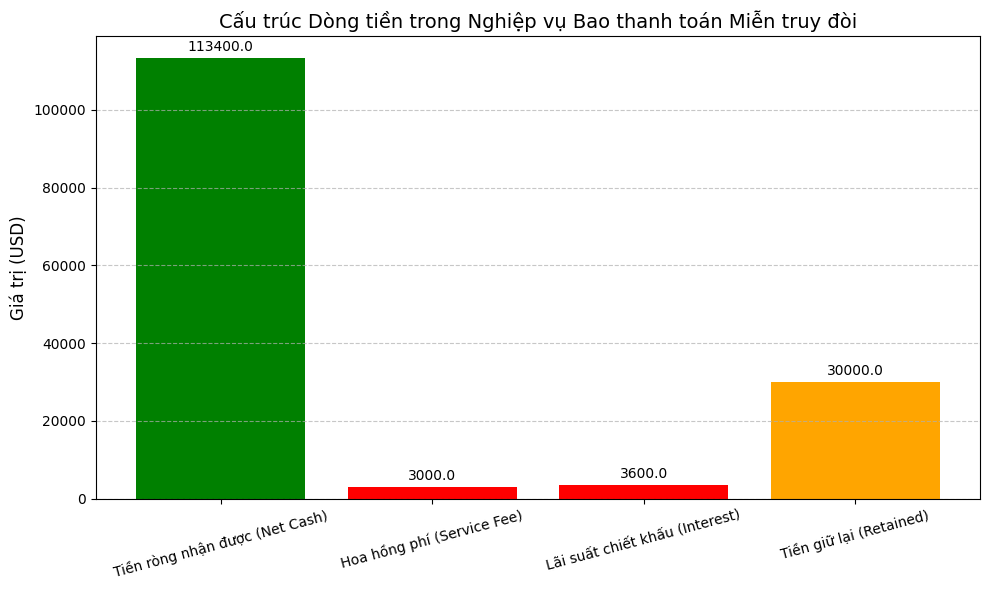

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Hàm tính toán logic
def calculate_factoring_costs(advance_amount, advance_rate, discount_rate_annual, service_fee_rate, tenor_months):
    """Tính toán chi phí và số tiền thực nhận."""
    
    if advance_rate <= 0 or advance_rate > 1:
        st.error("Tỷ lệ ứng trước (Advance Rate) phải nằm trong khoảng 0 đến 1.")
        return None
        
    total_ar = advance_amount / advance_rate
    service_fee = total_ar * service_fee_rate
    discount_interest = advance_amount * discount_rate_annual * (tenor_months / 12.0)
    
    total_costs = service_fee + discount_interest
    net_cash_received = advance_amount - total_costs
    reserve = total_ar - advance_amount
    
    results = {
        "Trị giá Nợ phải thu (Total AR)": total_ar,
        "Khoản tiền Ứng trước (Advance Amount)": advance_amount,
        "Hoa hồng phí (Service Fee)": service_fee,
        "Lãi suất chiết khấu (Discount Interest)": discount_interest,
        "Tổng chi phí (Total Cost)": total_costs,
        "Số tiền Thực nhận (Net Cash Received)": net_cash_received,
        "Khoản Dự trữ (Reserve)": reserve,
    }
    
    return results

# Hàm trực quan hóa (Tạo biểu đồ)
def create_visualization(results):
    """Tạo biểu đồ cột thể hiện cơ cấu Total AR."""
    
    net_cash = results["Số tiền Thực nhận (Net Cash Received)"]
    total_costs = results["Tổng chi phí (Total Cost)"]
    reserve = results["Khoản Dự trữ (Reserve)"]
    total_ar = results["Trị giá Nợ phải thu (Total AR)"]
    
    data = pd.DataFrame({
        'Thành phần': ['Số tiền Thực nhận', 'Tổng Chi phí', 'Khoản Dự trữ'],
        'Giá trị (USD)': [net_cash, total_costs, reserve]
    })
    
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(data['Thành phần'], data['Giá trị (USD)'], color=['#4CAF50', '#F44336', '#FFC107'])
    
    # Thêm nhãn giá trị
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, yval + (total_ar * 0.005), f'{yval:,.2f} USD', ha='center', va='bottom', fontsize=10)

    ax.set_title(f'Cơ cấu Trị giá Nợ phải thu: {total_ar:,.2f} USD', fontsize=14)
    ax.set_ylabel('Giá trị (USD)', fontsize=12)
    ax.xlabel('')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    return fig

# Xây dựng Giao diện Streamlit
st.set_page_config(page_title="Mô Hình Chi Phí Bao Thanh Toán", layout="wide")
st.title("💰 Công Cụ Mô Phỏng Chi Phí Bao Thanh Toán (Factoring)")
st.markdown("---")

st.sidebar.header("Tham Số Đầu Vào")

# Input widgets
# Sử dụng 0.8 cho 80%, 0.02 cho 2%, v.v.
advance_amount = st.sidebar.number_input("1. Khoản tiền Ứng trước (USD)", value=120000.0, min_value=1.0, step=1000.0, format="%.2f")
advance_rate_percent = st.sidebar.slider("2. Tỷ lệ Ứng trước (%)", value=80, min_value=50, max_value=95, step=5)
service_fee_rate_percent = st.sidebar.slider("3. Hoa hồng phí Dịch vụ (%)", value=2.0, min_value=0.5, max_value=5.0, step=0.1, format="%.1f")
discount_rate_percent = st.sidebar.slider("4. Lãi suất Chiết khấu/Năm (%)", value=12.0, min_value=5.0, max_value=25.0, step=0.1, format="%.1f")
tenor_months = st.sidebar.slider("5. Kỳ hạn Bao thanh toán (Tháng)", value=3, min_value=1, max_value=12, step=1)

# Chuyển đổi Input sang định dạng thập phân
advance_rate = advance_rate_percent / 100.0
service_fee_rate = service_fee_rate_percent / 100.0
discount_rate_annual = discount_rate_percent / 100.0


# Hiển thị Kết quả và Biểu đồ
if advance_amount and advance_rate:
    results = calculate_factoring_costs(
        advance_amount,
        advance_rate,
        discount_rate_annual,
        service_fee_rate,
        tenor_months
    )

    if results:
        st.header("Kết Quả Phân Tích Tài Chính")
        
        col1, col2, col3 = st.columns(3)
        col1.metric("Trị giá Nợ phải thu (Total AR)", f"{results['Trị giá Nợ phải thu (Total AR)']:,.2f} USD")
        col2.metric("Tổng Chi phí (Lãi + Phí)", f"{results['Tổng chi phí (Total Cost)']:,.2f} USD")
        col3.metric("Số tiền Thực nhận (Net Cash)", f"{results['Số tiền Thực nhận (Net Cash Received)']:,.2f} USD")

        st.markdown("---")

        st.subheader("Trực Quan Hóa Cơ Cấu Chi Phí")
        fig = create_visualization(results)
        st.pyplot(fig)
        
        st.markdown("---")
        
        st.subheader("Bảng Chi Tiết Giao Dịch")
        df_display = pd.DataFrame(results.items(), columns=['Chỉ tiêu', 'Giá trị (USD)'])
        df_display['Giá trị (USD)'] = df_display['Giá trị (USD)'].apply(lambda x: f"{x:,.2f}")
        st.table(df_display)